In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlutils
import warnings

warnings.filterwarnings('ignore')

Ingesting the file

In [2]:
def read_csv(path : str) -> pd.DataFrame:

    return pd.read_csv(path, index_col='id') 

In [3]:
df = read_csv("./data/train.csv")
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
id,,,,,,,,,,,,
0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


Explore the file

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630000 entries, 0 to 629999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               630000 non-null  int64  
 1   gender            630000 non-null  object 
 2   course            630000 non-null  object 
 3   study_hours       630000 non-null  float64
 4   class_attendance  630000 non-null  float64
 5   internet_access   630000 non-null  object 
 6   sleep_hours       630000 non-null  float64
 7   sleep_quality     630000 non-null  object 
 8   study_method      630000 non-null  object 
 9   facility_rating   630000 non-null  object 
 10  exam_difficulty   630000 non-null  object 
 11  exam_score        630000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 62.5+ MB


In [5]:
for col in df.select_dtypes(['object', 'int64']):

    print(f"\nThe column values for {col} are : {df[col].value_counts()}")


The column values for age are : age
21    86620
23    82872
20    80742
19    78885
24    77111
18    75632
22    74950
17    73188
Name: count, dtype: int64

The column values for gender are : gender
other     211097
male      210593
female    208310
Name: count, dtype: int64

The column values for course are : course
b.tech     131236
b.sc       111554
b.com      110932
bca         88721
bba         75644
ba          61989
diploma     49924
Name: count, dtype: int64

The column values for internet_access are : internet_access
yes    579423
no      50577
Name: count, dtype: int64

The column values for sleep_quality are : sleep_quality
poor       213675
good       213089
average    203236
Name: count, dtype: int64

The column values for study_method are : study_method
coaching         131697
self-study       131131
mixed            123086
group study      123009
online videos    121077
Name: count, dtype: int64

The column values for facility_rating are : facility_rating
medium    21

In [13]:
df.isnull().sum()

age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

Univariate analysis

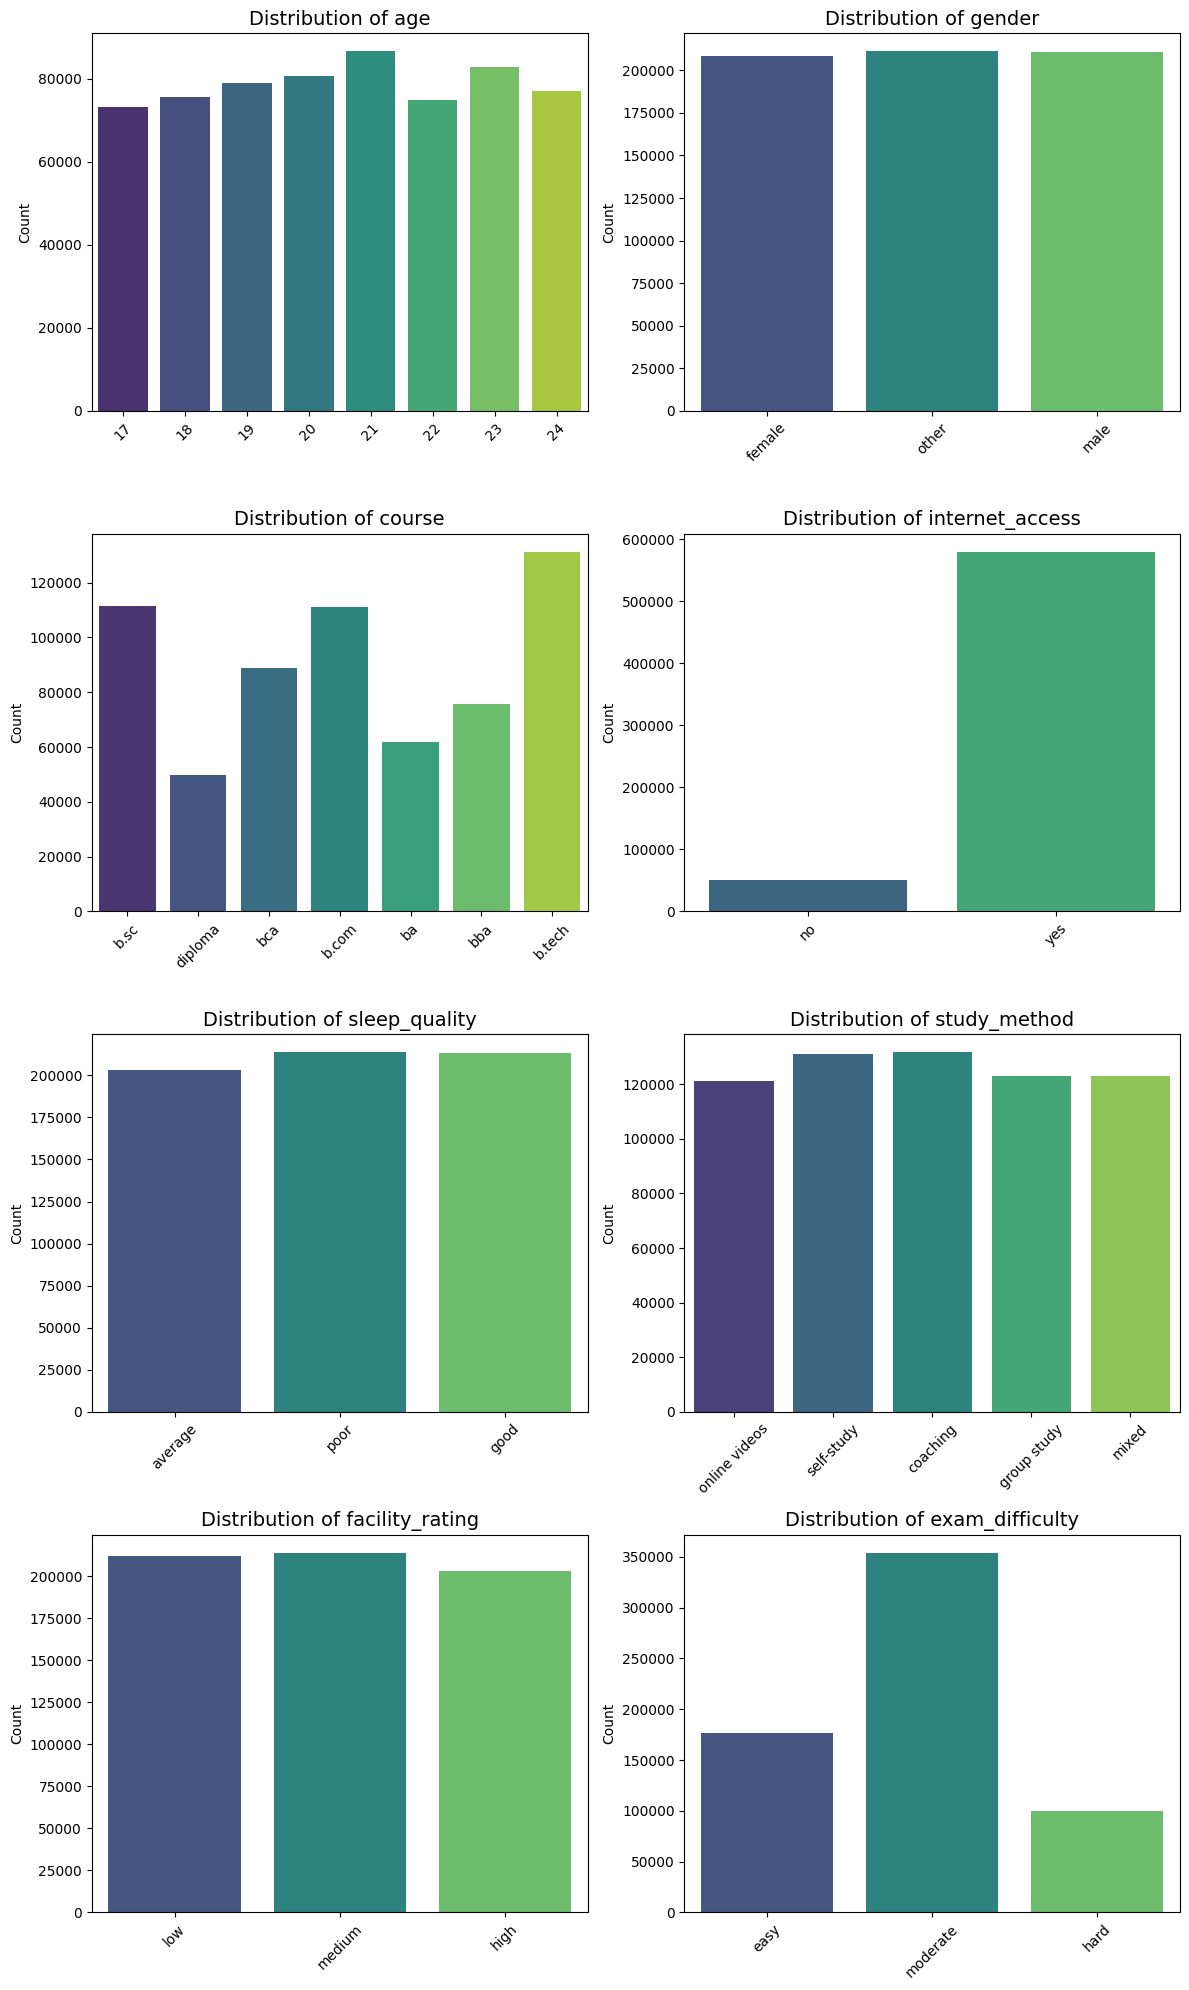

In [6]:
def plot_cat_vars(
    df: pd.DataFrame
    ) -> None:
    cols = df.select_dtypes(['object', 'int64']).columns
    nrows = int(np.ceil(len(cols) / 2))
    
    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(12, 5 * nrows))
    axes = axes.flatten()
    
    for i, col in enumerate(cols):

        sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
    
    for j in range(len(cols), len(axes)):
        axes[j].axis('off')
        
    plt.tight_layout()
    plt.show()

# Run the function
plot_cat_vars(df)

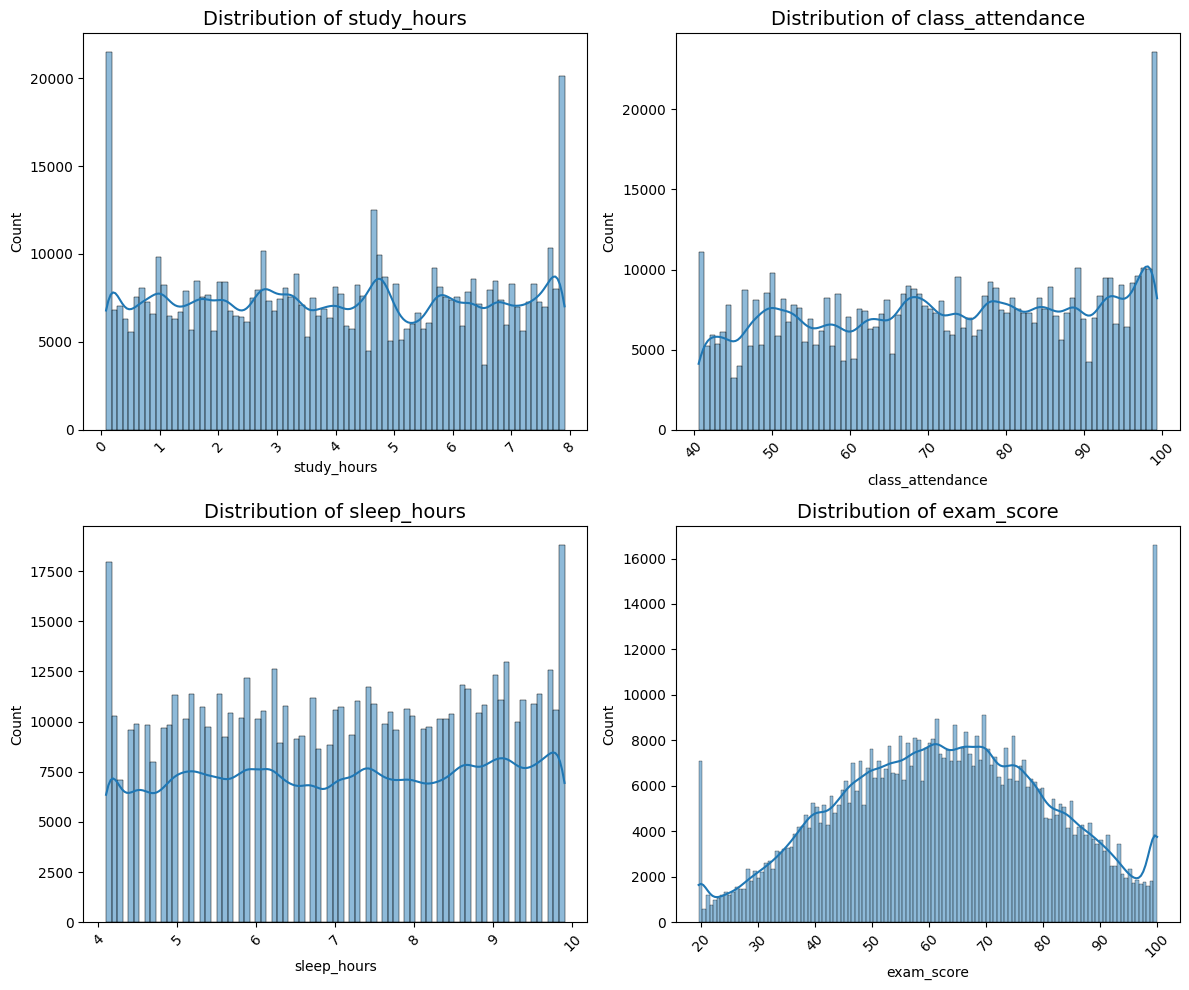

In [7]:
def plot_cont_vars(
    df : pd.DataFrame
) -> None:

    cols = df.select_dtypes(exclude=['object', 'category', 'int64']).columns
    nrows = int(np.ceil(len(cols)/2))
    ncols = 2
    
    # Create subplots
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5 * nrows))
    ax = ax.flatten()
    
    for i, col in enumerate(cols):

        sns.histplot(data=df, x=col, ax=ax[i], palette='viridis', kde=True)
        ax[i].set_title(f'Distribution of {col}', fontsize=14)
        ax[i].set_ylabel('Count')
        ax[i].tick_params(axis='x', rotation=45)
    
    for j in range(len(cols), len(ax)):
        ax[j].axis('off')
        
    plt.tight_layout()
    plt.show()

    pass


plot_cont_vars(df)

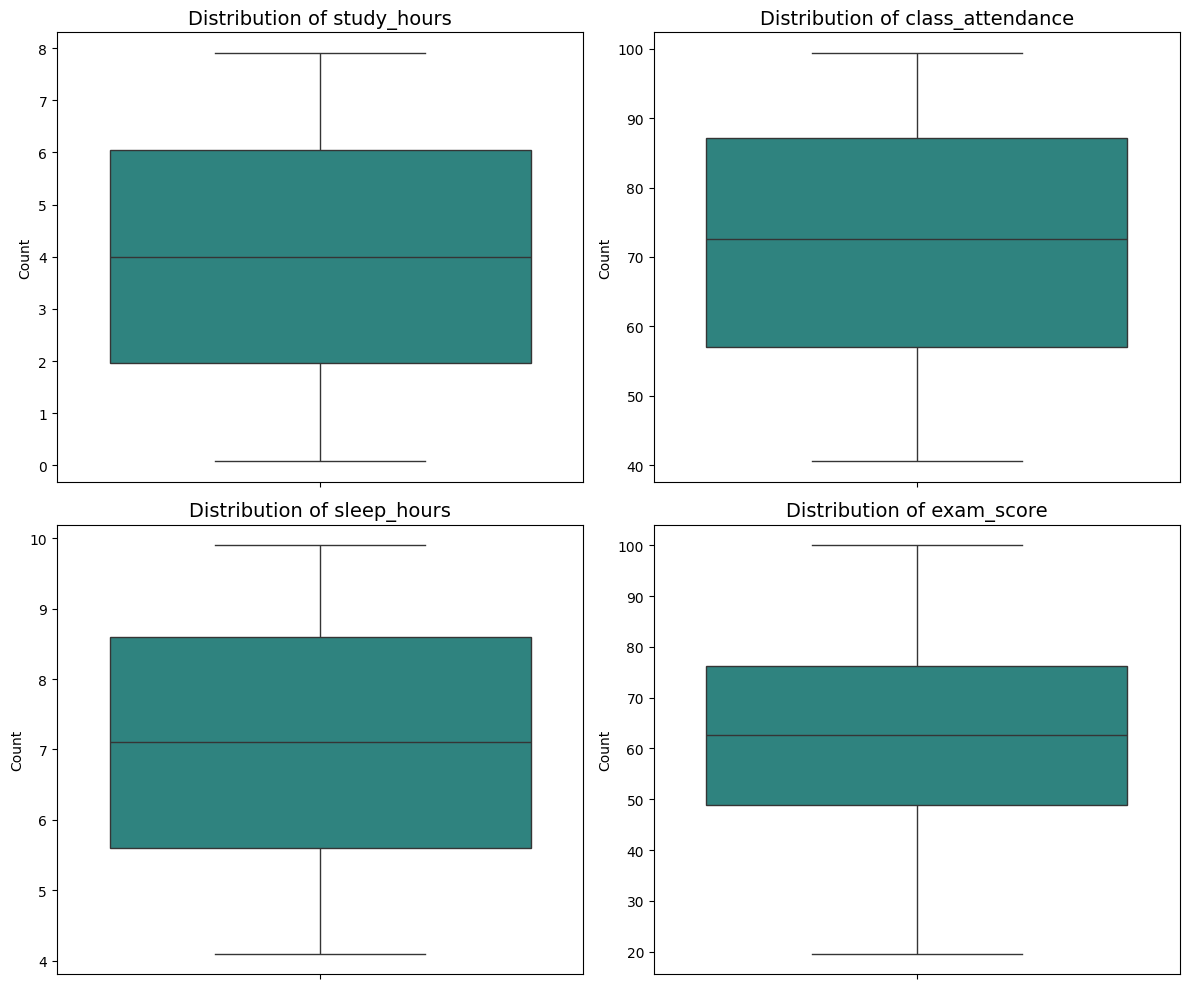

In [ ]:
def plot_outliers(df: pd.DataFrame) -> None:
    
    cols = df.select_dtypes(exclude=['object', 'category', 'int64']).columns
    nrows = int(np.ceil(len(cols)/2))
    ncols = 2
    
    # Create subplots
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5 * nrows))
    ax = ax.flatten()
    
    for i, col in enumerate(cols):

        sns.boxplot(data=df[col], ax=ax[i], palette='viridis')  #type: ignore
        ax[i].set_title(f'Distribution of {col}', fontsize=14)
        ax[i].set_ylabel('Count')
        ax[i].tick_params(axis='x', rotation=45)
    
    for j in range(len(cols), len(ax)):
        ax[j].axis('off')
        
    plt.tight_layout()
    plt.show()

    pass

plot_outliers(df)

Bivariate analysis

In [ ]:
#Before bivariate analysis, we need a way to encode the categorical variables
#For analysis, we can use a label encoder, later we can use complex methods
cat_df = df.select_dtypes(include='object')
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_df = le.fit_transform(cat_df)
cat_df


ValueError: y should be a 1d array, got an array of shape (630000, 7) instead.